In [18]:
import torch
from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline, StableDiffusionInpaintPipelineLegacy, DDIMScheduler, AutoencoderKL
from PIL import Image

from ip_adapter import IPAdapterLoRAMLP

In [19]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(3)  # chọn GPU 0


In [20]:
base_model_path = "runwayml/stable-diffusion-v1-5"
vae_model_path = "stabilityai/sd-vae-ft-mse"
image_encoder_path = "openai/clip-vit-base-patch32"
image_proj_path="/home/uit2023/LuuTru/Thuchd/cs431/IPAdapter/modelLoRAMLP/image_proj_step250000.bin"
ip_lora_path="/home/uit2023/LuuTru/Thuchd/cs431/IPAdapter/modelLoRAMLP/ip_lora_step250000.safetensors"
device = "cuda"

In [21]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

noise_scheduler = DDIMScheduler(
    num_train_timesteps=1000,
    beta_start=0.00085,
    beta_end=0.012,
    beta_schedule="scaled_linear",
    clip_sample=False,
    set_alpha_to_one=False,
    steps_offset=1,
)
vae = AutoencoderKL.from_pretrained(vae_model_path).to(dtype=torch.float16)

## Image Variations

In [22]:
pipe = StableDiffusionPipeline.from_pretrained(
    base_model_path,
    torch_dtype=torch.float16,
    scheduler=noise_scheduler,
    vae=vae,
    feature_extractor=None,
    safety_checker=None
)


Loading pipeline components...: 100%|██████████| 5/5 [00:00<00:00,  6.89it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


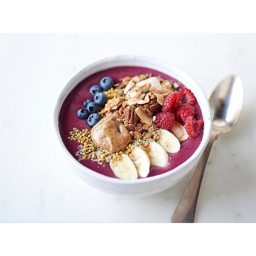

In [23]:
# read image prompt
image = Image.open("/home/uit2023/LuuTru/Thuchd/cs431/IP-Adapter/assets/images/cc3m6.jpg")
image.resize((256, 256))

In [24]:
# Dùng đúng file bạn train ra
ip_model = IPAdapterLoRAMLP(
    sd_pipe=pipe,
    image_proj_path= image_proj_path,
    ip_lora_path= ip_lora_path,
    image_encoder_path= image_encoder_path ,
    device="cuda",
)

Loading image_proj from /home/uit2023/LuuTru/Thuchd/cs431/IPAdapter/modelLoRAMLP/image_proj_step250000.bin ...
Loading LoRA weights from /home/uit2023/LuuTru/Thuchd/cs431/IPAdapter/modelLoRAMLP/ip_lora_step250000.safetensors ...
Missing keys: ['conv_in.weight', 'conv_in.bias', 'time_embedding.linear_1.weight', 'time_embedding.linear_1.bias', 'time_embedding.linear_2.weight', 'time_embedding.linear_2.bias', 'down_blocks.0.attentions.0.norm.weight', 'down_blocks.0.attentions.0.norm.bias', 'down_blocks.0.attentions.0.proj_in.weight', 'down_blocks.0.attentions.0.proj_in.bias', 'down_blocks.0.attentions.0.transformer_blocks.0.norm1.weight', 'down_blocks.0.attentions.0.transformer_blocks.0.norm1.bias', 'down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_q.base_layer.weight', 'down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_q.lora_A.ip_adapter_lora.weight', 'down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_q.lora_B.ip_adapter_lora.weight', 'down_blocks.0.attentions.0.tr

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:11<00:00,  4.22it/s]


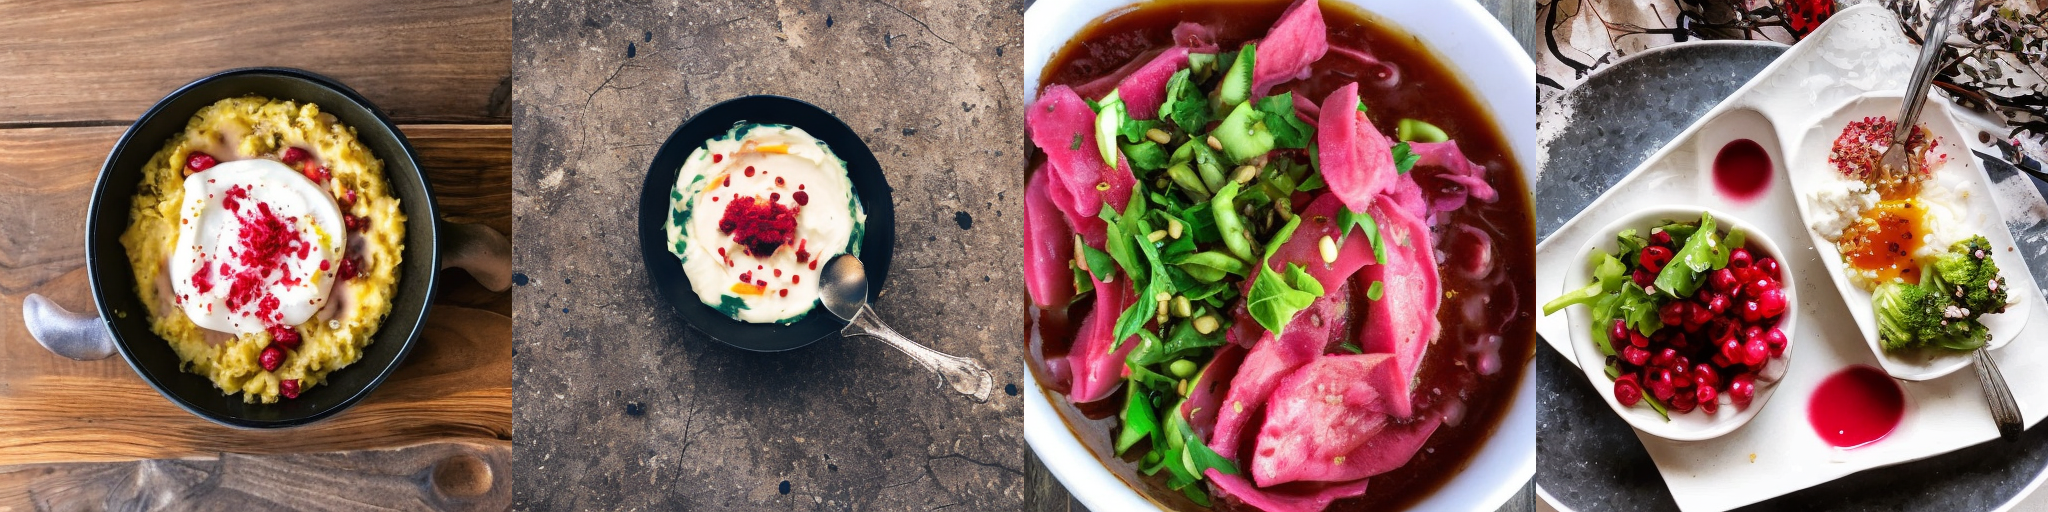

In [25]:
# generate image variations
images = ip_model.generate(pil_image=image, num_samples=4, num_inference_steps=50, seed=42)
grid = image_grid(images, 1, 4)
grid

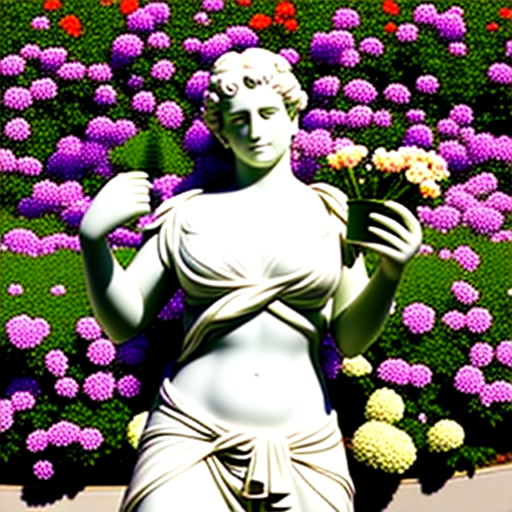

In [33]:
images[3]

# Multimodal

In [27]:
base_model_path = "SG161222/Realistic_Vision_V4.0_noVAE"
vae_model_path = "stabilityai/sd-vae-ft-mse"
image_encoder_path = "openai/clip-vit-base-patch32"
image_proj_path="/home/uit2023/LuuTru/Thuchd/cs431/IPAdapter/modelLoRAMLP/image_proj_step250000.bin"
ip_lora_path="/home/uit2023/LuuTru/Thuchd/cs431/IPAdapter/modelLoRAMLP/ip_lora_step250000.safetensors"
device = "cuda"

In [28]:
# load SD pipeline
del pipe, ip_model
pipe = StableDiffusionPipeline.from_pretrained(
    base_model_path,
    torch_dtype=torch.float16,
    scheduler=noise_scheduler,
    vae=vae,
    feature_extractor=None,
    safety_checker=None
)

Loading pipeline components...:  20%|██        | 1/5 [00:00<00:01,  2.05it/s]

Loading pipeline components...: 100%|██████████| 5/5 [00:00<00:00,  7.83it/s]


In [29]:
# Dùng đúng file bạn train ra
ip_model = IPAdapterLoRAMLP(
    sd_pipe=pipe,
    image_proj_path= image_proj_path,
    ip_lora_path= ip_lora_path,
    image_encoder_path= image_encoder_path ,
    device="cuda",
)

Loading image_proj from /home/uit2023/LuuTru/Thuchd/cs431/IPAdapter/modelLoRAMLP/image_proj_step250000.bin ...
Loading LoRA weights from /home/uit2023/LuuTru/Thuchd/cs431/IPAdapter/modelLoRAMLP/ip_lora_step250000.safetensors ...
Missing keys: ['conv_in.weight', 'conv_in.bias', 'time_embedding.linear_1.weight', 'time_embedding.linear_1.bias', 'time_embedding.linear_2.weight', 'time_embedding.linear_2.bias', 'down_blocks.0.attentions.0.norm.weight', 'down_blocks.0.attentions.0.norm.bias', 'down_blocks.0.attentions.0.proj_in.weight', 'down_blocks.0.attentions.0.proj_in.bias', 'down_blocks.0.attentions.0.transformer_blocks.0.norm1.weight', 'down_blocks.0.attentions.0.transformer_blocks.0.norm1.bias', 'down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_q.base_layer.weight', 'down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_q.lora_A.ip_adapter_lora.weight', 'down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_q.lora_B.ip_adapter_lora.weight', 'down_blocks.0.attentions.0.tr

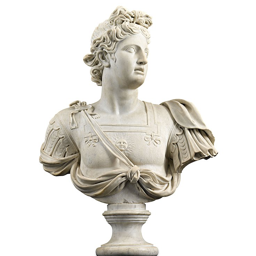

In [30]:
# read image prompt
image = Image.open("assets/images/statue.png")
image.resize((256, 256))

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:12<00:00,  4.16it/s]


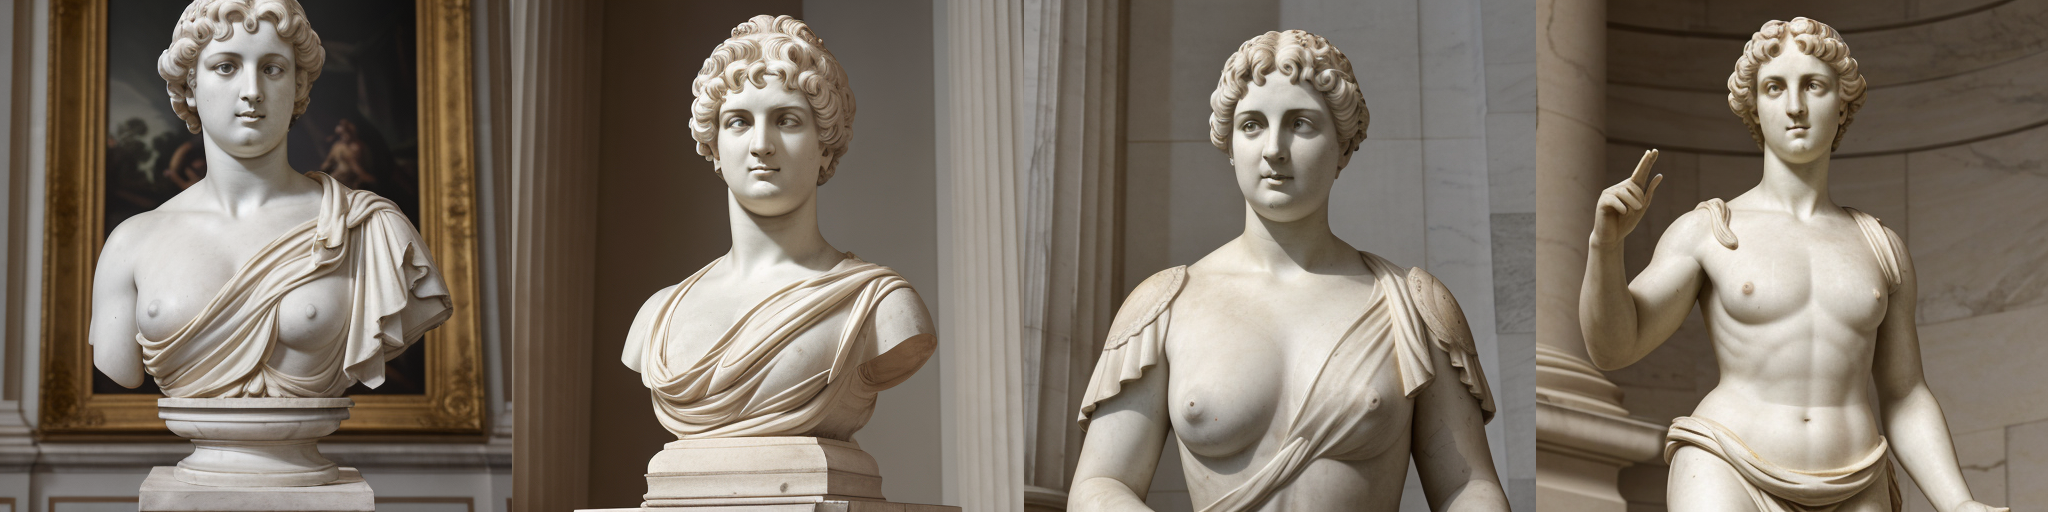

In [31]:
# only image prompt
images = ip_model.generate(pil_image=image, num_samples=4, num_inference_steps=50, seed=42)
grid = image_grid(images, 1, 4)
grid

100%|██████████| 50/50 [00:11<00:00,  4.19it/s]


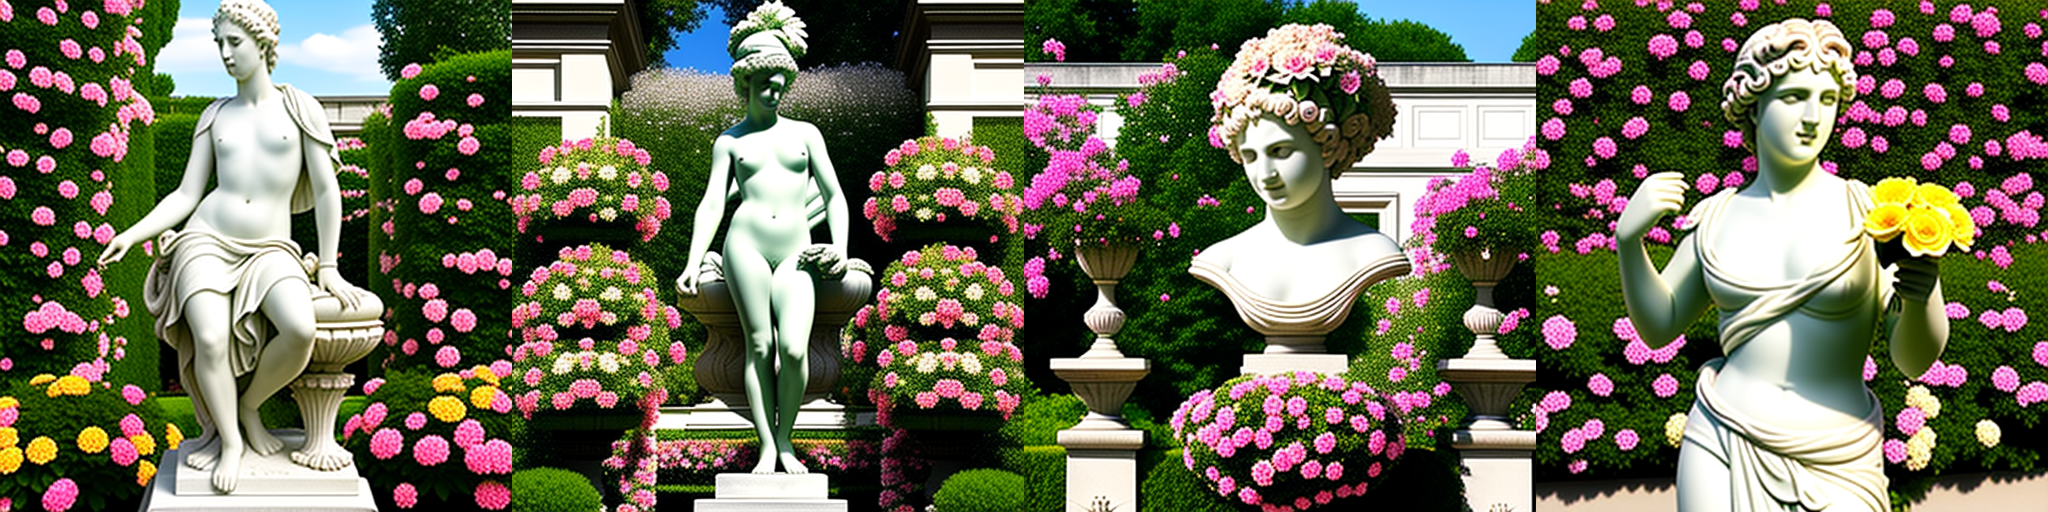

In [34]:
# multimodal prompts
images = ip_model.generate(pil_image=image, num_samples=4, num_inference_steps=50, seed=42,
        prompt="best quality, high quality, in a garden with flowers", scale=0.7)
grid = image_grid(images, 1, 4)
grid